In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly .express as px


In [2]:
df=pd.read_csv('Unemployment in India.csv.xls')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
print(df.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [7]:
df.rename(columns={'Region': 'State'}, inplace=True)

In [8]:
df = df.dropna()
df = df.reset_index(drop=True)

In [9]:
df.columns = df.columns.str.strip()

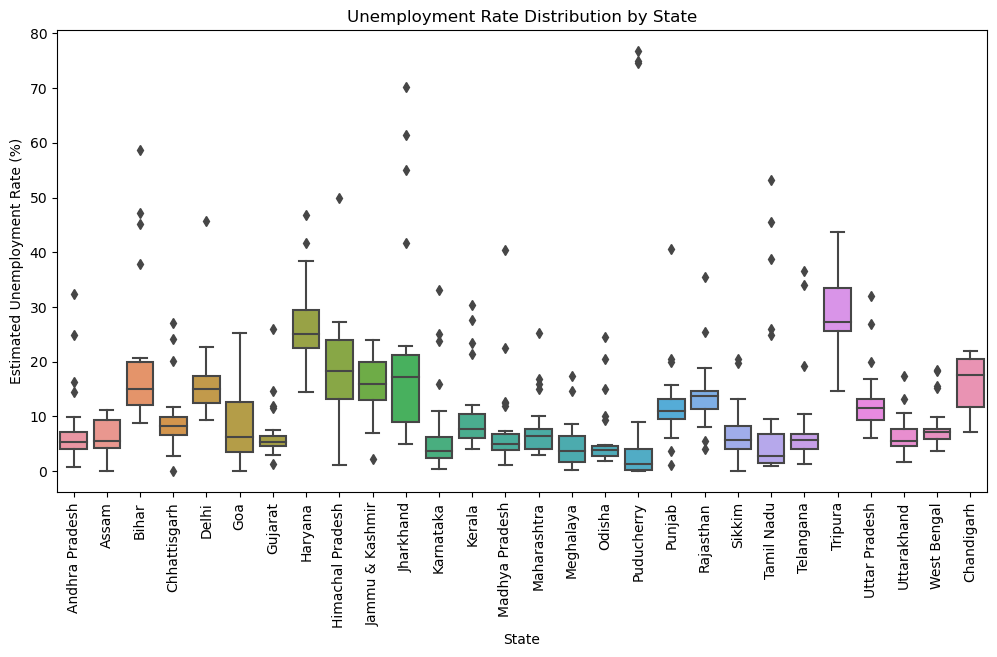

In [10]:
sns.set_palette("husl")

plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Estimated Unemployment Rate (%)', data=df)
plt.title("Unemployment Rate Distribution by State")
plt.xlabel("State")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.show()

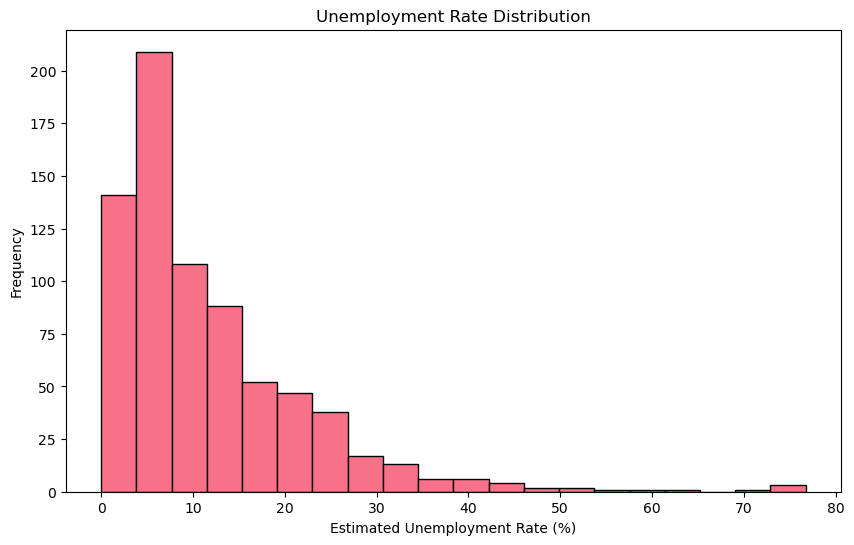

In [11]:
#histogram of unemplyment rate
plt.figure(figsize=(10, 6))
plt.hist(df['Estimated Unemployment Rate (%)'], bins=20, edgecolor='k')
plt.title("Unemployment Rate Distribution")
plt.xlabel("Estimated Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

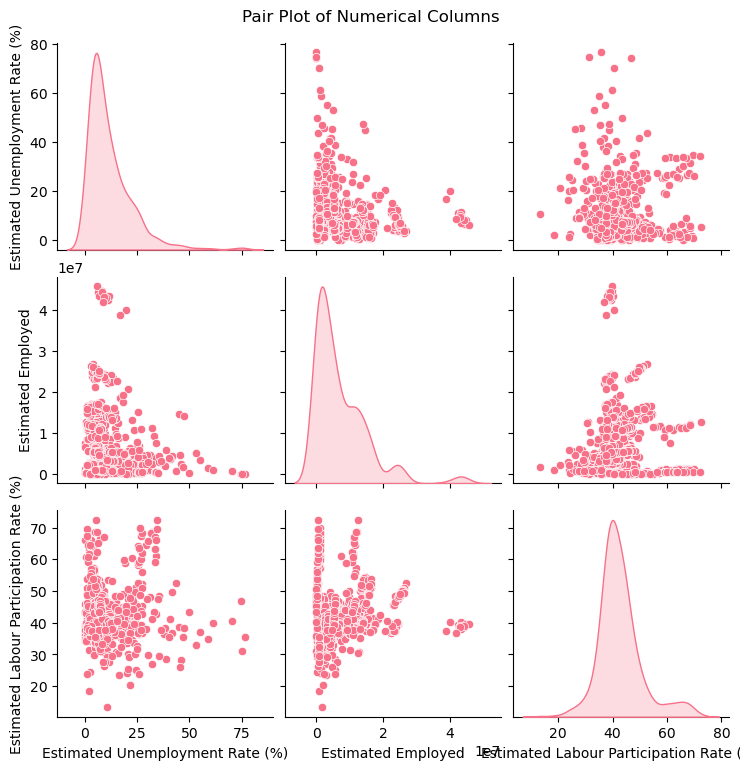

In [12]:
#pairplot
sns.set_palette("husl")

sns.pairplot(df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']], diag_kind='kde')
plt.suptitle("Pair Plot of Numerical Columns", y=1.02)
plt.show()

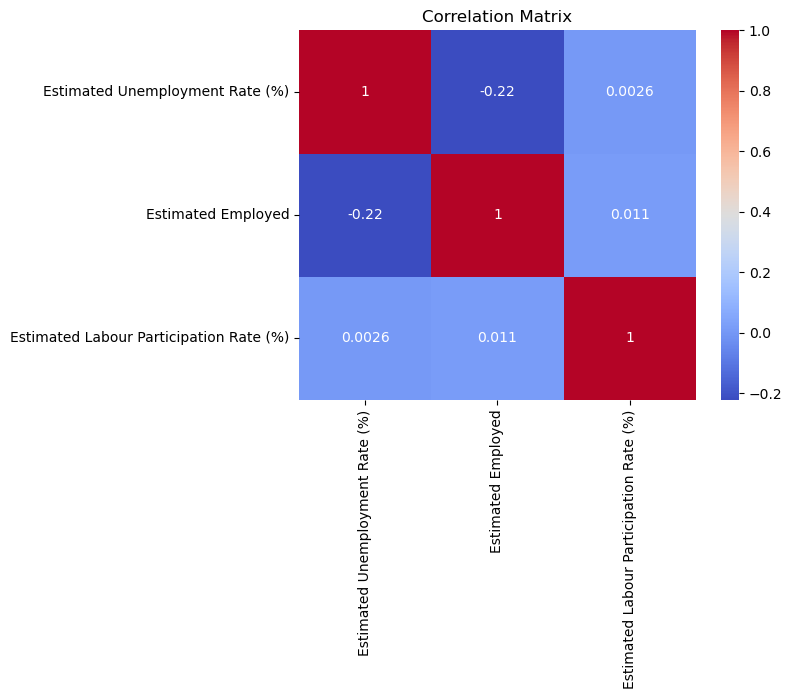

In [13]:
corr_matrix = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: ylabel='count'>

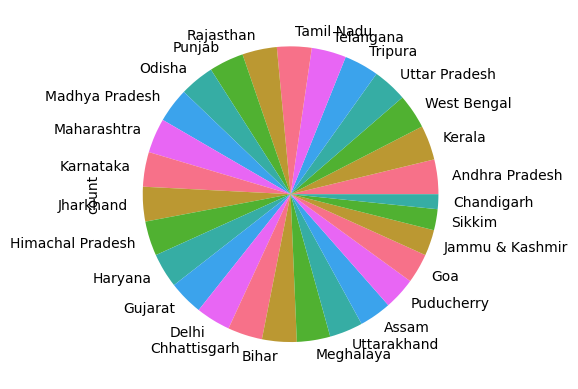

In [14]:

df['State'].value_counts().plot.pie()